In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
from sklearn.preprocessing import StandardScaler,MinMaxScaler

warnings.filterwarnings("ignore")

In [2]:
dfx = pd.read_csv("C://Users//byuva//Downloads//stocknet_trn_data.csv")
dfx

,Open,High,Low,Volume
0,75.430000,75.910004,75.139999,3436700.0
1,124.930000,124.940002,124.169998,2366700.0
2,84.339996,84.370003,82.370003,11338700.0
3,56.770000,57.150002,56.529999,413300.0
4,47.419998,48.090000,46.759998,9531100.0
...,...,...,...,...
97727,103.650002,103.809998,103.089996,3678200.0
97728,64.419998,64.730003,64.190002,20273100.0
97729,581.070007,581.400024,571.070007,3416500.0
97730,120.650002,120.650002,114.959999,13261700.0


In [3]:
dfy = pd.read_csv("C://Users//byuva//Downloads//stocknet_trn_data_targets.csv", header=None)
dfy

,0,1
0,d1,75.650002
1,d2,124.449997
2,d3,82.660004
3,d4,57.009998
4,d5,47.860001
...,...,...
97727,d97728,103.230003
97728,d97729,64.620003
97729,d97730,575.140015
97730,d97731,115.400002


In [4]:
#dfx = dfx.dropna()
#dfx

In [5]:
dfx[dfx['High'].isnull()].index.tolist()

[7642, 46002, 61502]

In [6]:
dfx[dfx['Low'].isnull()].index.tolist()

[7642, 46002, 61502]

In [7]:
dfx[dfx['Volume'].isnull()].index.tolist()

[7642, 46002, 61502]

In [8]:
dfx[dfx['Open'].isnull()].index.tolist()

[7642, 46002, 61502]

In [9]:
dfx.skew()

Open      9.475348
High      9.473054
Low       9.476892
Volume    6.506281
dtype: float64

In [10]:
# dfx['Open'].fillna(int(dfx['Open'].mean()), inplace = True)
dfx

,Open,High,Low,Volume
0,75.430000,75.910004,75.139999,3436700.0
1,124.930000,124.940002,124.169998,2366700.0
2,84.339996,84.370003,82.370003,11338700.0
3,56.770000,57.150002,56.529999,413300.0
4,47.419998,48.090000,46.759998,9531100.0
...,...,...,...,...
97727,103.650002,103.809998,103.089996,3678200.0
97728,64.419998,64.730003,64.190002,20273100.0
97729,581.070007,581.400024,571.070007,3416500.0
97730,120.650002,120.650002,114.959999,13261700.0


In [11]:
dfx.mean()

Open      2.427661e+03
High      2.439557e+03
Low       2.413965e+03
Volume    9.064781e+06
dtype: float64

In [12]:
dfx.median()

Open      6.596000e+01
High      6.649000e+01
Low       6.546000e+01
Volume    3.544600e+06
dtype: float64

In [13]:
stock = pd.concat([dfx,dfy[1]],axis=1)

In [14]:
stock[stock[1].isnull()].index.tolist()

[7642, 46002, 61502]

In [15]:
stock.skew()

Open      9.475348
High      9.473054
Low       9.476892
Volume    6.506281
1         9.475081
dtype: float64

In [16]:
stock_= stock.dropna()
stock_

,Open,High,Low,Volume,1
0,75.430000,75.910004,75.139999,3436700.0,75.650002
1,124.930000,124.940002,124.169998,2366700.0,124.449997
2,84.339996,84.370003,82.370003,11338700.0,82.660004
3,56.770000,57.150002,56.529999,413300.0,57.009998
4,47.419998,48.090000,46.759998,9531100.0,47.860001
...,...,...,...,...,...
97727,103.650002,103.809998,103.089996,3678200.0,103.230003
97728,64.419998,64.730003,64.190002,20273100.0,64.620003
97729,581.070007,581.400024,571.070007,3416500.0,575.140015
97730,120.650002,120.650002,114.959999,13261700.0,115.400002


In [17]:
stock_

,Open,High,Low,Volume,1
0,75.430000,75.910004,75.139999,3436700.0,75.650002
1,124.930000,124.940002,124.169998,2366700.0,124.449997
2,84.339996,84.370003,82.370003,11338700.0,82.660004
3,56.770000,57.150002,56.529999,413300.0,57.009998
4,47.419998,48.090000,46.759998,9531100.0,47.860001
...,...,...,...,...,...
97727,103.650002,103.809998,103.089996,3678200.0,103.230003
97728,64.419998,64.730003,64.190002,20273100.0,64.620003
97729,581.070007,581.400024,571.070007,3416500.0,575.140015
97730,120.650002,120.650002,114.959999,13261700.0,115.400002


In [18]:
# stock_[1] = stock_[1].shift(-3)

# stock_test = stock_.tail(-3).drop(columns = 1,axis = 1)
# stock_test
# stock_ = stock_[:-3]
# stock_.tail()

### Linear Regression

In [65]:
X_train, X_test, y_train, y_test = train_test_split(stock_[['Open' ,'High' , 'Low', 'Volume']], stock_[[1]], test_size=.2)

In [66]:
print(X_test.describe())

               Open          High           Low        Volume
count  1.954600e+04  1.954600e+04  1.954600e+04  19546.000000
mean   9.902787e-03  9.945698e-03  9.909327e-03      0.014921
std    8.466214e-02  8.501922e-02  8.472544e-02      0.030180
min    3.299146e-07  3.664578e-08  8.116942e-07      0.000000
25%    1.395539e-04  1.399917e-04  1.399804e-04      0.001932
50%    2.318988e-04  2.331749e-04  2.317710e-04      0.005705
75%    3.513865e-04  3.533294e-04  3.517126e-04      0.014799
max    9.915688e-01  9.917364e-01  9.893742e-01      0.751663


In [67]:
print(X_train.describe())

               Open          High           Low        Volume
count  78183.000000  78183.000000  78183.000000  78183.000000
mean       0.008638      0.008678      0.008647      0.014646
std        0.078669      0.079018      0.078749      0.028957
min        0.000000      0.000000      0.000000      0.000000
25%        0.000141      0.000141      0.000141      0.001945
50%        0.000235      0.000236      0.000235      0.005761
75%        0.000350      0.000352      0.000350      0.014531
max        1.000000      1.000000      1.000000      1.000000


In [68]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
# Relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[-5.92196679e-01  8.19573559e-01  7.74535152e-01  1.51590073e-06]]
Mean Squared Error: 7.560862729953898e-08
Coefficient of Determination: 0.9999895761631236


In [70]:
# next_val = model.predict(stock_test[['Open' ,'High' , 'Low']])

# plt.plot(pd.DataFrame(stock1[1].tail(5).tolist(),index =range(1,5) )) 
# plt.plot(pd.DataFrame(next_val.reshape(1,-1).tolist()[0],index = range(5,9)))
# # stock1[1].tail(10).tolist() + next_val.reshape(1,-1).tolist()[0]


In [71]:
dfz = pd.read_csv("C://Users//byuva//Downloads//stocknet_tst_data.csv")
dfz

,Open,High,Low,Volume
0,26.299999,26.520000,25.959999,32642100
1,95.550003,95.739998,94.019997,1826300
2,54.770000,55.360001,54.590000,5656800
3,125.589996,125.820000,123.660004,4151600
4,20.709999,20.809999,20.670000,10489800
...,...,...,...,...
10855,51.660000,52.919998,49.919998,87000
10856,39.549999,40.619999,39.189999,35177200
10857,22.780001,22.900000,22.389999,9404100
10858,33.750000,34.060001,33.580002,26179000


In [72]:
pred = model.predict(dfz)

In [73]:
pred

array([[75.7494338 ],
       [97.47185889],
       [63.79400236],
       ...,
       [36.87551708],
       [73.62169561],
       [98.01490229]])

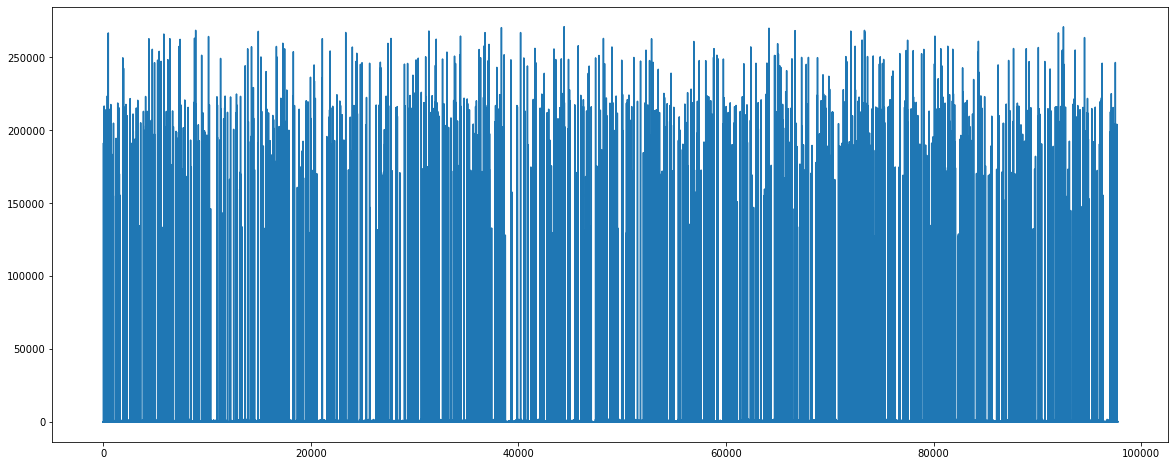

In [28]:
scaled = MinMaxScaler().fit_transform(dfx['Open'].values.reshape(-1,1))

dfx = pd.DataFrame(scaled,columns = ['Open'])
ax = plt.figure(figsize=(20,8))
plt.plot(dfy[1])
# new_dfy
plt.show()

In [29]:
dfp = pd.DataFrame(pred).header = None
dfp

<AxesSubplot:xlabel='Open', ylabel='1'>

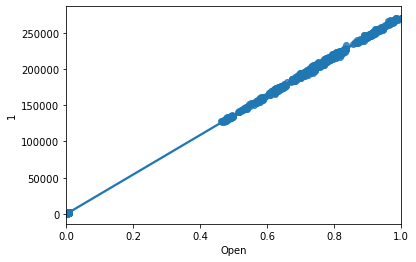

In [30]:
sns.regplot(x=dfx['Open'], y=dfy[1])

In [31]:
stock1=stock

In [32]:
stock1['Open'].fillna(int(stock1['Open'].mean()), inplace = True)

In [33]:
stock1['High'].fillna(int(stock1['High'].mean()), inplace = True)

In [34]:
stock1['Low'].fillna(int(stock1['Low'].mean()), inplace = True)

In [35]:
stock1[1].fillna(int(stock1[1].mean()), inplace = True)

In [36]:
stock1

,Open,High,Low,Volume,1
0,75.430000,75.910004,75.139999,3436700.0,75.650002
1,124.930000,124.940002,124.169998,2366700.0,124.449997
2,84.339996,84.370003,82.370003,11338700.0,82.660004
3,56.770000,57.150002,56.529999,413300.0,57.009998
4,47.419998,48.090000,46.759998,9531100.0,47.860001
...,...,...,...,...,...
97727,103.650002,103.809998,103.089996,3678200.0,103.230003
97728,64.419998,64.730003,64.190002,20273100.0,64.620003
97729,581.070007,581.400024,571.070007,3416500.0,575.140015
97730,120.650002,120.650002,114.959999,13261700.0,115.400002


In [37]:
#stock1[1] = stock1[1].shift(-15)

In [38]:
stock1

,Open,High,Low,Volume,1
0,75.430000,75.910004,75.139999,3436700.0,75.650002
1,124.930000,124.940002,124.169998,2366700.0,124.449997
2,84.339996,84.370003,82.370003,11338700.0,82.660004
3,56.770000,57.150002,56.529999,413300.0,57.009998
4,47.419998,48.090000,46.759998,9531100.0,47.860001
...,...,...,...,...,...
97727,103.650002,103.809998,103.089996,3678200.0,103.230003
97728,64.419998,64.730003,64.190002,20273100.0,64.620003
97729,581.070007,581.400024,571.070007,3416500.0,575.140015
97730,120.650002,120.650002,114.959999,13261700.0,115.400002


In [39]:
# stock_test = stock1.tail(15).drop(columns = 1,axis = 1)
# stock_test
# stock1 = stock1[:-15]
# stock1.tail()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(stock1[['Open','High' , 'Low']], stock1[[1]], test_size=.2)

In [41]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
# Use model to make predictions
y1_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y1_pred))
print("Coefficient of Determination:", r2_score(y_test, y1_pred))

Model Coefficients: [[-0.59078429  0.81888992  0.77216585]]
Mean Absolute Error: 6.469764139845405
Coefficient of Determination: 0.9999861226691189


In [43]:
y1_pred

array([[29.07615566],
       [47.68366047],
       [35.92220514],
       ...,
       [43.13639535],
       [61.07112528],
       [38.35352357]])

### SVR

In [44]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [45]:
scaled = MinMaxScaler().fit_transform(stock_)

stock_ = pd.DataFrame(scaled,columns = stock_.columns)

In [46]:
stock_

,Open,High,Low,Volume,1
0,0.000269,0.000270,0.000270,0.005573,0.000272
1,0.000450,0.000449,0.000451,0.003838,0.000452
2,0.000301,0.000301,0.000297,0.018388,0.000297
3,0.000200,0.000201,0.000201,0.000670,0.000203
4,0.000166,0.000168,0.000165,0.015457,0.000169
...,...,...,...,...,...
97724,0.000372,0.000372,0.000373,0.005965,0.000373
97725,0.000228,0.000229,0.000230,0.032878,0.000231
97726,0.002122,0.002122,0.002100,0.005541,0.002114
97727,0.000434,0.000434,0.000417,0.021507,0.000418


In [47]:
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10,100,1000],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}

In [48]:
tuning_model=GridSearchCV(stock_,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=0)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(stock_[['Open','High' , 'Low', 'Volume']], stock_[[1]], test_size=.2)

In [50]:
#svr_lin  = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr= SVR(kernel='rbf', C=1e3, gamma=0.1)
    
# Fit regression model
#svr_lin .fit((stock1[['Open', 'High', 'Low', 1]], stock1[[1]]))
#svr_poly.fit(Open, 1)
svr.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [51]:
prediction = svr.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [52]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Squared Error:", mean_squared_error(y_test, prediction))
print("Coefficient of Determination:", r2_score(y_test, prediction))

Model Coefficients: [[-0.59078429  0.81888992  0.77216585]]
Mean Squared Error: 0.00977921124615093
Coefficient of Determination: -0.5468888713528417


In [53]:
prediction

array([0.10064259, 0.66727836, 0.0999802 , ..., 0.09996126, 0.74786984,
       0.09992914])

In [54]:
s_pred =svr.predict(dfz)
s_pred

array([0.48316549, 0.48316549, 0.48316549, ..., 0.48316549, 0.48316549,
       0.48316549])

### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(stock_[['Open','High' , 'Low', 'Volume']], stock_[[1]], test_size = 0.2)
tree = DecisionTreeRegressor(random_state=1).fit(X_train, y_train)
tree.score(X_test, y_test)

0.9999653284773713

In [56]:
pred_tree = tree.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, pred_tree))
print("Coefficient of Determination:", r2_score(y_test, pred_tree))

Model Coefficients: [[-0.59078429  0.81888992  0.77216585]]
Mean Absolute Error: 3.9821150467533e-05
Coefficient of Determination: 0.9999653284773713


In [58]:
#tst_data = dfz
#prediction = tree.predict(tst_data)
#print(prediction)

In [59]:
dtr_pred =tree.predict(dfz)

In [60]:
dtr_pred

array([0.9996237, 0.9996237, 0.9996237, ..., 0.9996237, 0.9996237,
       0.9996237])

### Saving the closing prices

In [74]:
np.savetxt("B.Yuvaraj Goud_predicted_closing_prices.txt",pred , delimiter="\n", fmt="%.0f")